# **Module 11 Python Packages Assignment - LLM Module**
#### Completed by Michelle Gordon

## Libraries Used:
### [NLTK - Natural Language Toolkit](https://www.nltk.org/)
NLTK is a library built for working with language data that uses natural language processing (NLP) for all sorts of purposes.  One example is sentiment analysis.  The advantages of this library are that it includes a lot of processing tools you would likely need for any NLP project. As you will see in my code below, some of these tools include a tokenizer that breaks the dataset provided into individual words.  Some of the other tools I used removed stopwords (such as periods) and generated lists with words paired with their part-of-speech (POS) tags.  POS tags tell you what grammatical category each word falls under.  For example, NN=nouns, NNS = plural nounse, and JJ = adjectives.  
A limitation is that it seems the stopwords methods possibly remove actual words in addition to stop words.  As I will note in the two graphs below, it seems like the 20 most frequently used words are not consistent before and after processing the data to remove stopwords.  
### [WordCloud - A word cloud generator](https://amueller.github.io/word_cloud/)
I also decided to use the WordCloud library to create a word cloud visualization to corroborate with the data from the graph above. A limitation I hit was that it did not accept the processed data in the format it was in. I decided to feed it the raw data extracted from the article, and it produced an interesting result (explanation of result located below word cloud).  Aside from that, it was extremely easy to use.

## [The Dataset](https://www.ncbi.nlm.nih.gov/books/NBK537065/)
I used an article from the National Library of Medicine titled *Physiology, Edema* as my dataset.  I extracted the body text of the article, and excluded the references and navigational content on the page. 

Below is code demonstrating the library being imported and used with the aforementioned dataset:

In [66]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load dataset (the Edema article)
with open('edema.txt', 'r') as file:
    article = file.read()

# Tokenize the data
tokens = word_tokenize(article)

# Remove stop words
stop_words = set(stopwords.words('english'))
filtered_tokens = [word.lower() for word in tokens if word.isalnum() and word.lower() not in stop_words]


In [72]:
# Instantiate word frequency distribution object
freq_dist = FreqDist(filtered_tokens)
# print top 10 most common words.  You can change number in parenthesis to whatever number of words you want to see.
print(f"10 most common words:\n{freq_dist.most_common(10)}\n")

# Create part-of-speech tags
tagged_words = nltk.pos_tag(filtered_tokens)
# print 10 words with their POS tags.  You can also adjust how many words you want to see by changing the number. 
print(f"Sample of 10 article words with their respective POS tags:\n{tagged_words[:10]}\n")


10 most common words:
[('edema', 69), ('pressure', 49), ('fluid', 43), ('capillary', 42), ('interstitial', 27), ('oncotic', 22), ('failure', 18), ('due', 17), ('also', 16), ('disease', 15)]

Sample of 10 article words with their respective POS tags:
[('physiology', 'NN'), ('edema', 'NN'), ('daniella', 'NN'), ('ishwarlal', 'NN'), ('jialal', 'NN'), ('author', 'NN'), ('information', 'NN'), ('affiliations', 'NNS'), ('last', 'JJ'), ('update', 'JJ')]



## Creating a Frequency Distribution Graph:

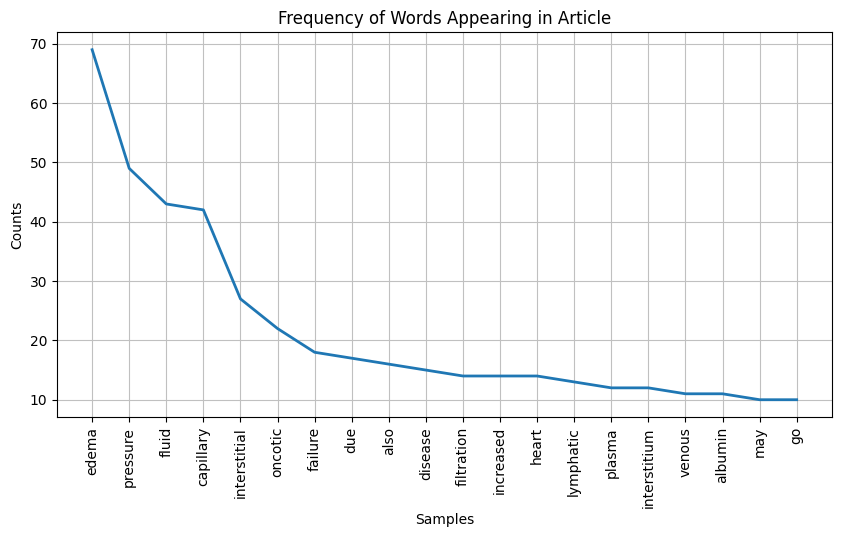

<Axes: title={'center': 'Frequency of Words Appearing in Article'}, xlabel='Samples', ylabel='Counts'>

In [73]:
#plot the frequency distribution of words
plt.figure(figsize=(10, 5))
freq_dist.plot(20, title='Frequency of Words Appearing in Article', cumulative=False)

#### Interpretation: 
These are the 20 most frequently used words in the medical article.  The graph shows that the most frequently used word is "edema", which makes sense as it is the topic of the article.  The further toward the right you travel on the x-axis, the lower the frequency count is for the respective word.  

## Creating a Word Cloud:

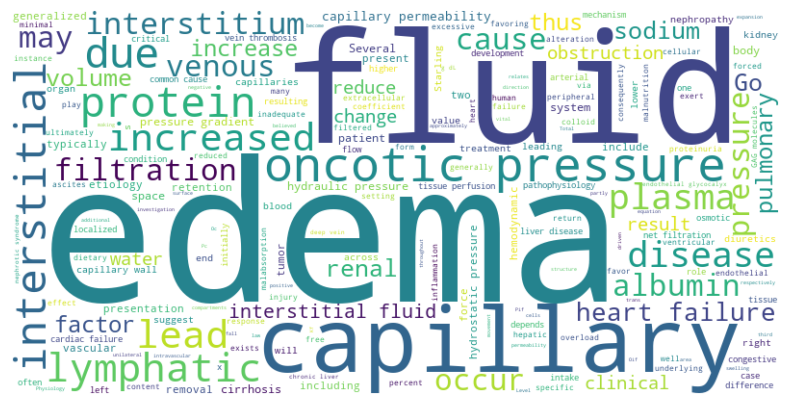

In [76]:
# Instantiate a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

#### Interpretation: 
As you can see, the wordcloud shows the top three most frequently used words to be edema, fluid, and capillary.  This is an interesting result because the previous graph showed edema, pressure, and fluid to be the top three most frequently used words.  This tells me that some data may have been lost when processing the dataset via tokenizing and removing the stopwords because the number of times the word pressure appears should be the same whether or not characters such as periods exists in the dataset.